<a href="https://colab.research.google.com/github/wcj365/python-dataviz/blob/master/python_dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Dataviz
- Static Visualization:
    - Matplotlib (low-level)
    - Pandas (high-level)
    - Seaborn (high-level)
- Interactive Visualization:
    - Plotly (low level)
    - Plotly Express (high-level)
    - Bokeh 
    - Altair (Declarative)



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [0]:
# We will load data directly from the website
DATA_URL = "https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-All-Data-Elements.csv"

# The file has many columns, load only the ones that are of our interest
COLUMN_NAMES = ['UNITID', 'INSTNM', 'CITY', 'STABBR',"REGION", "CONTROL", "TUITIONFEE_IN", "MD_EARN_WNE_P6"]


In [54]:
# Load data
df = pd.read_csv(DATA_URL, usecols = COLUMN_NAMES)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 8 columns):
UNITID            7112 non-null int64
INSTNM            7112 non-null object
CITY              7112 non-null object
STABBR            7112 non-null object
CONTROL           7112 non-null int64
REGION            7112 non-null int64
TUITIONFEE_IN     4021 non-null float64
MD_EARN_WNE_P6    5887 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 444.6+ KB


In [55]:
df.head()

,UNITID,INSTNM,CITY,STABBR,CONTROL,REGION,TUITIONFEE_IN,MD_EARN_WNE_P6
0,100654,Alabama A & M University,Normal,AL,1,5,9857.0,25200
1,100663,University of Alabama at Birmingham,Birmingham,AL,1,5,8328.0,35100
2,100690,Amridge University,Montgomery,AL,2,5,6900.0,30700
3,100706,University of Alabama in Huntsville,Huntsville,AL,1,5,10280.0,36200
4,100724,Alabama State University,Montgomery,AL,1,5,11068.0,22600


In [62]:
# Drop all rows that have missing values

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 7098
Data columns (total 8 columns):
UNITID            3577 non-null int64
INSTNM            3577 non-null object
CITY              3577 non-null object
STABBR            3577 non-null object
CONTROL           3577 non-null object
REGION            3577 non-null int64
TUITIONFEE_IN     3577 non-null float64
MD_EARN_WNE_P6    3577 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 251.5+ KB


In [32]:
# MD_EARN_WNE_P6 should be numerical(type float64) 
# but Pandas treated it as categorical (type object)
# Find out why

df["MD_EARN_WNE_P6"].describe()

count                  3726
unique                  453
top       PrivacySuppressed
freq                    149
Name: MD_EARN_WNE_P6, dtype: object

In [63]:
# Looks like there are 149 rows (colleges) have "PrivacySuppressed" 
# Drop these rows

df = df[df["MD_EARN_WNE_P6"] != "PrivacySuppressed"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 7098
Data columns (total 8 columns):
UNITID            3577 non-null int64
INSTNM            3577 non-null object
CITY              3577 non-null object
STABBR            3577 non-null object
CONTROL           3577 non-null object
REGION            3577 non-null int64
TUITIONFEE_IN     3577 non-null float64
MD_EARN_WNE_P6    3577 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 251.5+ KB


In [64]:
# Now convert it from categorical to numberic 

df["MD_EARN_WNE_P6"] = df["MD_EARN_WNE_P6"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 7098
Data columns (total 8 columns):
UNITID            3577 non-null int64
INSTNM            3577 non-null object
CITY              3577 non-null object
STABBR            3577 non-null object
CONTROL           3577 non-null object
REGION            3577 non-null int64
TUITIONFEE_IN     3577 non-null float64
MD_EARN_WNE_P6    3577 non-null float64
dtypes: float64(2), int64(2), object(4)
memory usage: 251.5+ KB


In [0]:
# The variable CONTROL should be categorical.
# However, PAndas treated it as numerical.
# We will convert it from numerical to categorical

CONTROL_DICT = {
    1: 'Public', 
    2: 'Private Nonprofit', 
    3: 'Private For-Profit'
}

df["CONTROL"].replace(to_replace = CONTROL_DICT, inplace = True)

df.sample(5)         # sample 5 colleges 

Text(0, 0.5, 'Potential Earnings')

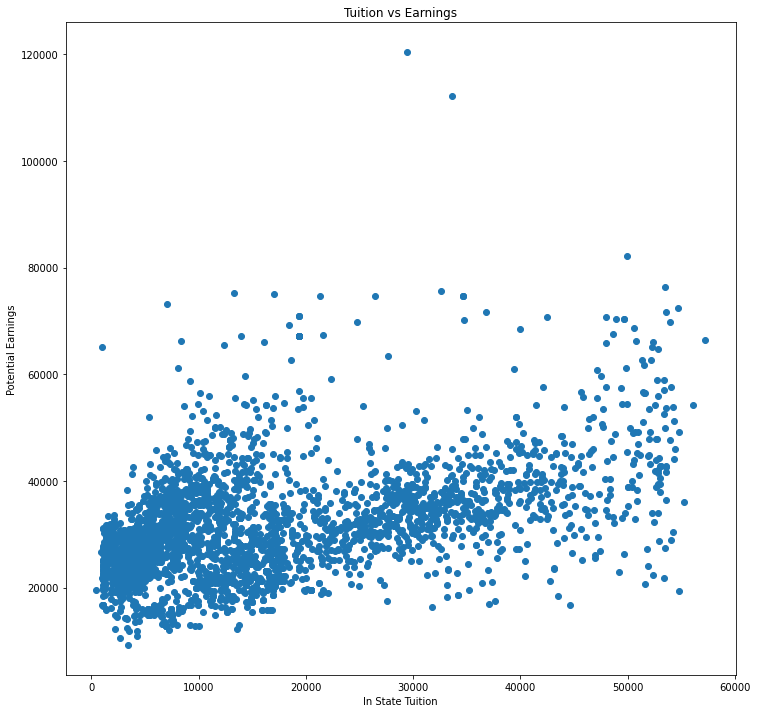

In [65]:
# Dava viz using Matplotlib 

plt.figure(figsize=(12,12))

plt.scatter(df["TUITIONFEE_IN"], df["MD_EARN_WNE_P6"])

plt.title("Tuition vs Earnings")
plt.xlabel("In State Tuition")
plt.ylabel("Potential Earnings")


Text(0, 0.5, 'Potential Earnings')

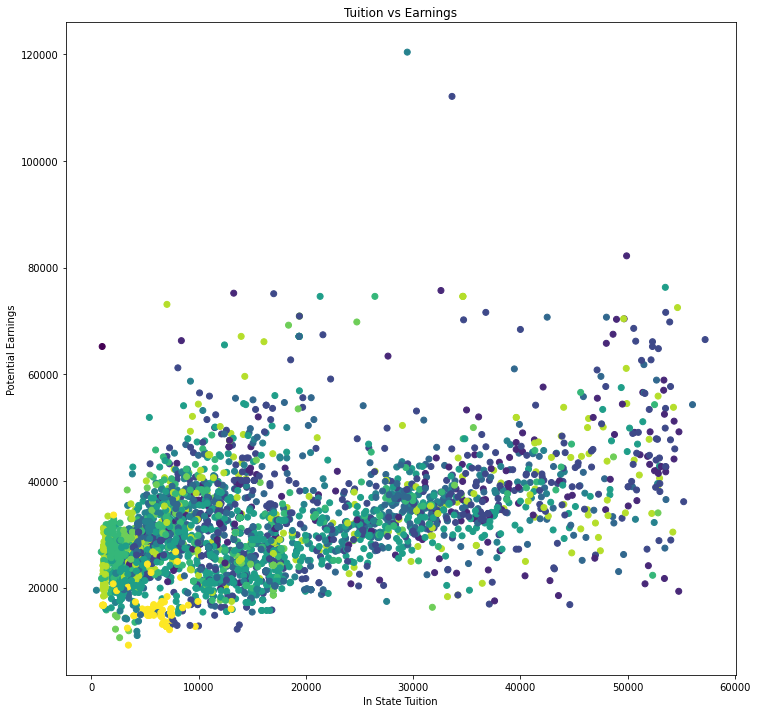

In [67]:
# Dava viz using Matplotlib 
# Add color to the marks based on the REGION variable. 
# However, we don't have a legend to indicate which color is for which region
# To do that in Matplotlib requires heavy low-level coding

plt.figure(figsize=(12,12))

plt.scatter(df["TUITIONFEE_IN"], df["MD_EARN_WNE_P6"], c=df["REGION"])

plt.title("Tuition vs Earnings")
plt.xlabel("In State Tuition")
plt.ylabel("Potential Earnings")

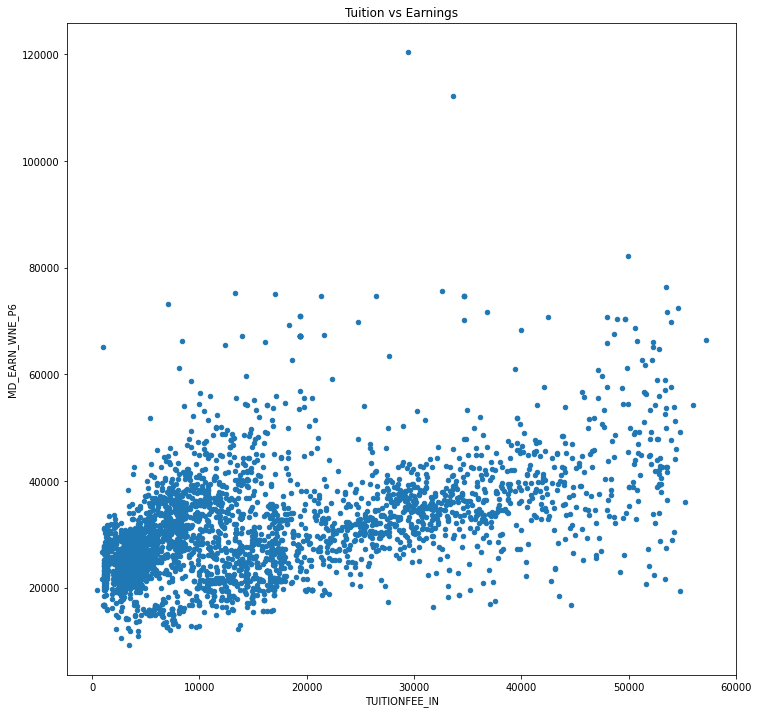

In [75]:
# Use Pandas plot


df.plot.scatter(x="TUITIONFEE_IN", y="MD_EARN_WNE_P6", title="Tuition vs Earnings", figsize=(12,12))

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

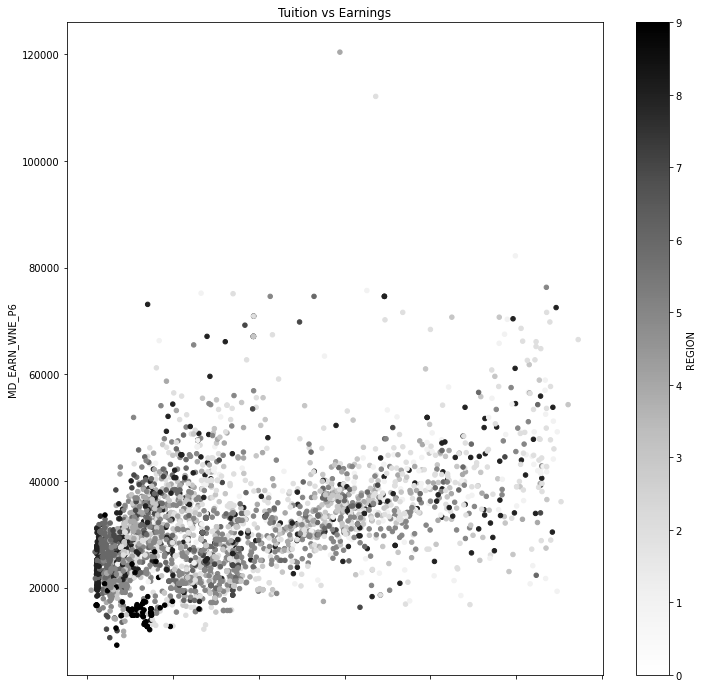

In [74]:
# The Pandas plot using c="REGION" option looks different from the one by Matplotlib

df.plot.scatter(x="TUITIONFEE_IN", y="MD_EARN_WNE_P6", title="Tuition vs Earnings", figsize=(12,12), c="REGION")

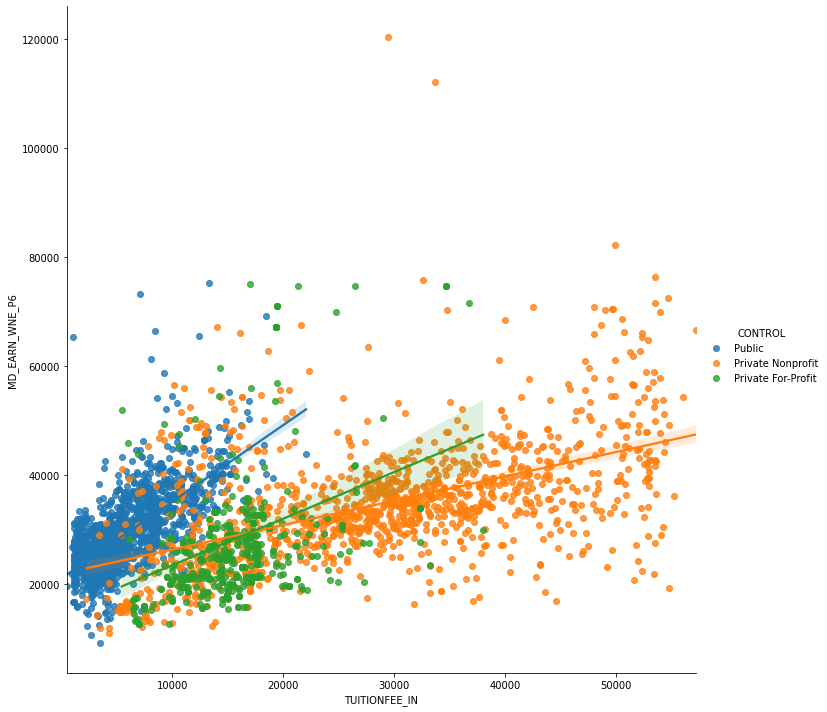

In [90]:
# Use Seaborn
# This plot is very revealling.
# The public school has the steepest regression line 
# indicating it has the best earnings/tuition ratio.

sns.lmplot(x="TUITIONFEE_IN", y="MD_EARN_WNE_P6", hue="CONTROL", data=df, height=10)


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


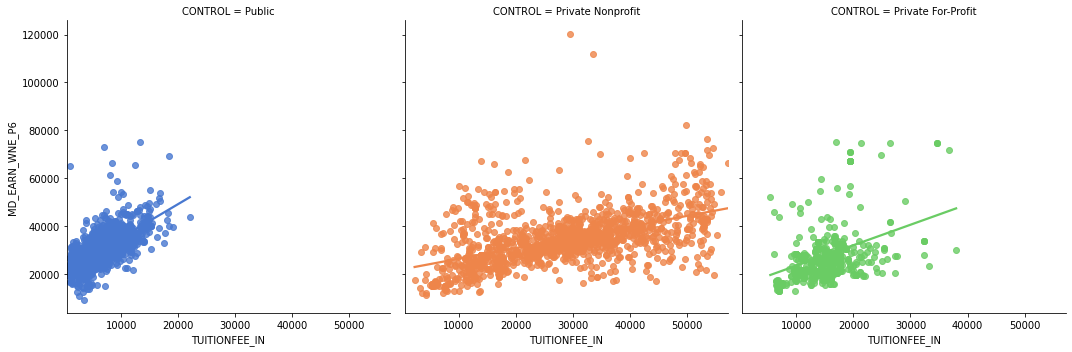

In [83]:
# Compare three types of institutions side by side

sns.lmplot(x="TUITIONFEE_IN", y="MD_EARN_WNE_P6", col="CONTROL", hue="CONTROL", data=df,
           col_wrap=3, ci=None, palette="muted", size=5)

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


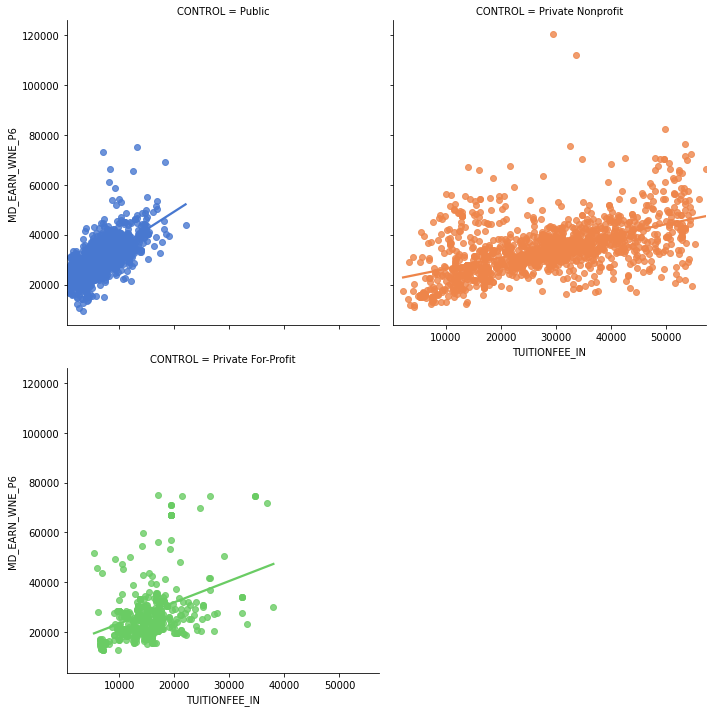

In [108]:
# Two column layout

sns.lmplot(x="TUITIONFEE_IN", y="MD_EARN_WNE_P6", col="CONTROL", hue="CONTROL", data=df,
           col_wrap=2, ci=None, palette="muted", size=5)

In [93]:
# Similarly with REGION
# First, convert the variable from numerical to categorical

REGION_DICT = {
    0:	"U.S. Service Schools",
    1:	"New England (CT, ME, MA, NH, RI, VT)",
    2:  "Mid East (DE, DC, MD, NJ, NY, PA)",
    3:	"Great Lakes (IL, IN, MI, OH, WI)",
    4:	"Plains (IA, KS, MN, MO, NE, ND, SD)",
    5:	"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)",
    6:	"Southwest (AZ, NM, OK, TX)",
    7:	"Rocky Mountains (CO, ID, MT, UT, WY)",
    8:	"Far West (AK, CA, HI, NV, OR, WA)",
    9:	"Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)"
}

df["REGION"].replace(to_replace=REGION_DICT, inplace=True)

df.sample(5)



,UNITID,INSTNM,CITY,STABBR,CONTROL,REGION,TUITIONFEE_IN,MD_EARN_WNE_P6
1969,180160,Chief Dull Knife College,Lame Deer,MT,Public,"Rocky Mountains (CO, ID, MT, UT, WY)",2260.0,12200.0
384,118930,Mission College,Santa Clara,CA,Public,"Far West (AK, CA, HI, NV, OR, WA)",1185.0,28600.0
763,137315,South Florida State College,Avon Park,FL,Public,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",3165.0,24100.0
3985,244233,City College-Fort Lauderdale,Fort Lauderdale,FL,Private Nonprofit,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",13695.0,23300.0
1556,166018,Hampshire College,Amherst,MA,Private Nonprofit,"New England (CT, ME, MA, NH, RI, VT)",51608.0,20700.0


In [99]:
df["REGION"].value_counts()

Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)    952
Mid East (DE, DC, MD, NJ, NY, PA)                             560
Great Lakes (IL, IN, MI, OH, WI)                              533
Far West (AK, CA, HI, NV, OR, WA)                             403
Plains (IA, KS, MN, MO, NE, ND, SD)                           379
Southwest (AZ, NM, OK, TX)                                    316
New England (CT, ME, MA, NH, RI, VT)                          220
Rocky Mountains (CO, ID, MT, UT, WY)                          128
Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)                85
U.S. Service Schools                                            1
Name: REGION, dtype: int64

In [105]:
df = df[df["REGION"] != "U.S. Service Schools"]
df["REGION"].value_counts()        


Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)    952
Mid East (DE, DC, MD, NJ, NY, PA)                             560
Great Lakes (IL, IN, MI, OH, WI)                              533
Far West (AK, CA, HI, NV, OR, WA)                             403
Plains (IA, KS, MN, MO, NE, ND, SD)                           379
Southwest (AZ, NM, OK, TX)                                    316
New England (CT, ME, MA, NH, RI, VT)                          220
Rocky Mountains (CO, ID, MT, UT, WY)                          128
Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)                85
Name: REGION, dtype: int64

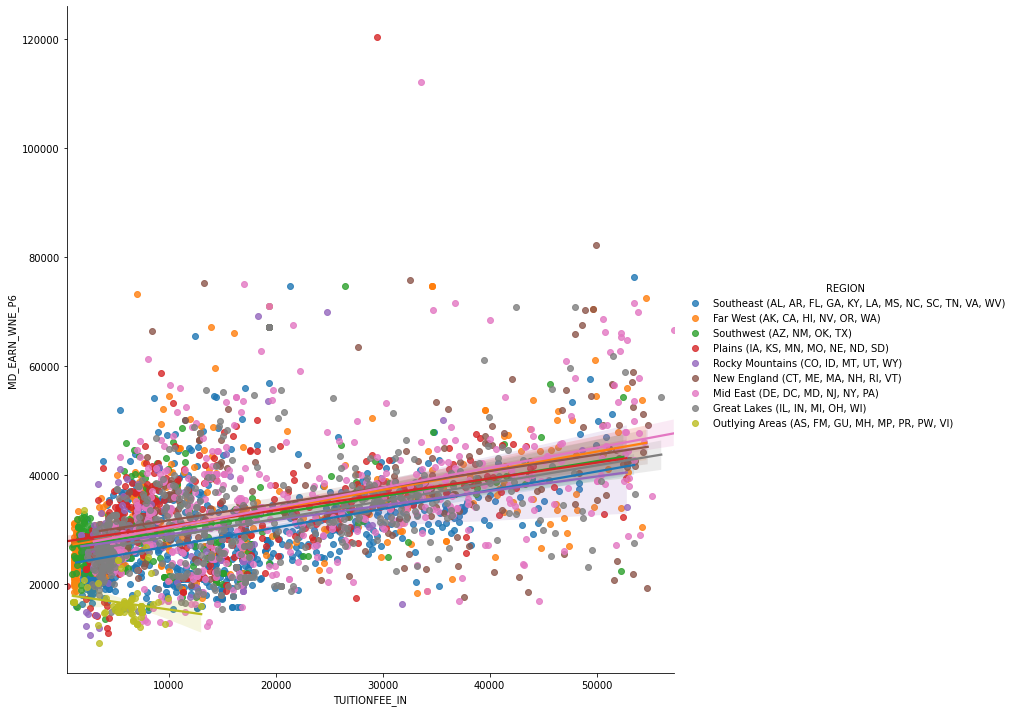

In [107]:
# Color based on the region. 
# It does not look good. MAybe too many colors.
# Better to nail down to a few regions

sns.lmplot(x="TUITIONFEE_IN", y="MD_EARN_WNE_P6", data=df, hue="REGION", height=10)

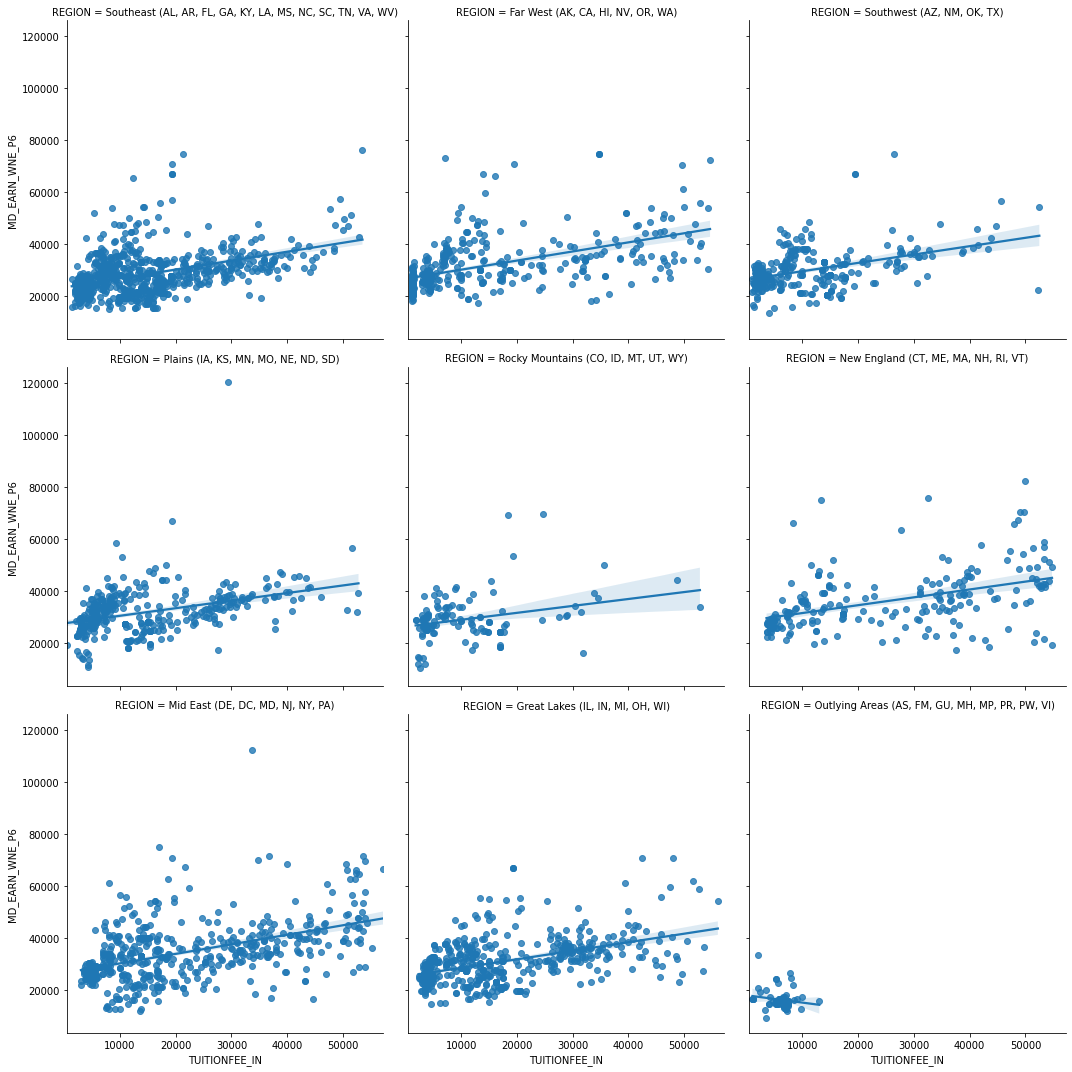

In [106]:
sns.lmplot(x="TUITIONFEE_IN", y="MD_EARN_WNE_P6", data=df, col="REGION", col_wrap=3,   height=5)

In [141]:
# Use Altair for interactive visualization

scatter_plot = alt.Chart(df, title="College Tuition vs Earnings").mark_circle(size=100).encode(
    x="TUITIONFEE_IN",
    y="MD_EARN_WNE_P6",
    color="CONTROL",
    tooltip=["INSTNM", "CITY","STABBR"]
).properties(
    width=800,
    height=800
)

reg_lines = scatter_plot.transform_regression('TUITIONFEE_IN', 'MD_EARN_WNE_P6', 
        groupby=['CONTROL']).mark_line(size=4)

scatter_plot + reg_lines

alt.LayerChart(...)

In [144]:
# Three plots side by side
# Two many lines of duplicate code, probably can use functions to simplify it.
# Notice the x-axises have different scales and should be made with same scale.
# NEed to check for option to set scales.

scatter_plot1 = alt.Chart(df[df["CONTROL"] == "Public"], title="Public").mark_circle(size=80, color="red").encode(
    x="TUITIONFEE_IN",
    y="MD_EARN_WNE_P6",
    tooltip=["INSTNM", "CITY","STABBR"]
).properties(
    width=300,
    height=300
)

reg_line1 = scatter_plot1.transform_regression('TUITIONFEE_IN', 'MD_EARN_WNE_P6', 
    ).mark_line(size=4, color="red")

scatter_plot2 = alt.Chart(df[df["CONTROL"] == "Private For-Profit"], title="Private For-Profit").mark_circle(size=80, color="blue").encode(
    x="TUITIONFEE_IN",
    y="MD_EARN_WNE_P6",
    tooltip=["INSTNM", "CITY","STABBR"]
).properties(
    width=300,
    height=300
)

reg_line2 = scatter_plot2.transform_regression('TUITIONFEE_IN', 'MD_EARN_WNE_P6', 
    ).mark_line(size=4, color="blue")

scatter_plot3 = alt.Chart(df[df["CONTROL"] == "Private Nonprofit"], title="Private Nonprofit").mark_circle(size=80, color="orange").encode(
    x="TUITIONFEE_IN",
    y="MD_EARN_WNE_P6",
    tooltip=["INSTNM", "CITY","STABBR"]
).properties(
    width=300,
    height=300
)

reg_line3 = scatter_plot3.transform_regression('TUITIONFEE_IN', 'MD_EARN_WNE_P6', 
    ).mark_line(size=4, color="orange")
scatter_plot1 + reg_line1 | scatter_plot2 + reg_line2 | scatter_plot3 + reg_line3

alt.HConcatChart(...)